<a href="https://colab.research.google.com/github/manabtikadar/my_project/blob/main/CNN_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
from keras import datasets,layers,models

In [5]:
(X_train_orig,Y_train_orig),(X_test_orig,Y_test_orig) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [10]:
print(f"shape of training datasets(X_train_orig):{X_train_orig.shape}")
print(f"shape of training datasets(Y_train_orig):{Y_train_orig.shape}")

shape of training datasets(X_train_orig):(50000, 32, 32, 3)
shape of training datasets(Y_train_orig):(50000, 1)


In [11]:
print(f"shape of test datasets(X_test_orig):{X_test_orig.shape}")
print(f"shape of test datasets(Y_test_orig):{Y_test_orig.shape}")

shape of test datasets(X_test_orig):(10000, 32, 32, 3)
shape of test datasets(Y_test_orig):(10000, 1)


In [12]:
Y_train_orig[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [42]:
Y_train = Y_train_orig.reshape(-1,)
Y_train_orig[:10]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3], dtype=uint8)

In [43]:
Y_test = Y_test_orig.reshape(-1,)
Y_test_orig.shape

(10000,)

In [44]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

In [45]:
import math
def plot_sample(X,Y,index1,index2):
  plt.figure(figsize=(10,10))
  num_images = index2 - index1
  cols = 5
  rows = math.ceil(num_images / cols)
  for i in range(index1,index2):
       plt.subplot(rows,cols,i-index1+1)
       plt.xticks([])
       plt.yticks([])
       plt.imshow(X[i])
       plt.xlabel(class_names[Y[i]])
  plt.show()

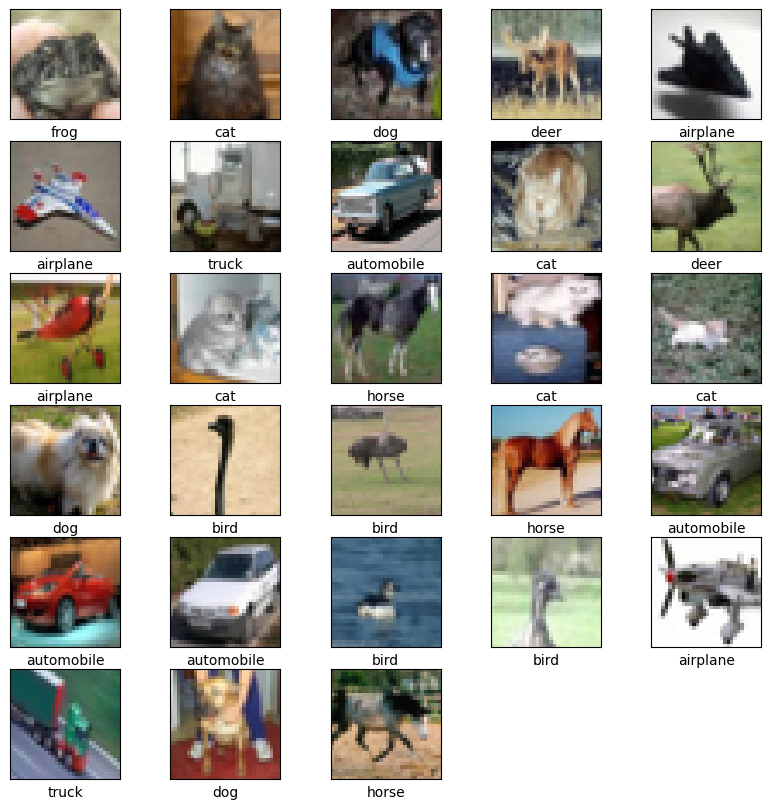

In [46]:
plot_sample(X_train_orig,Y_train,25,53)

In [38]:
X_train = X_train_orig/255.0
X_test = X_test_orig/255.0

In [71]:
# Sequential Model
model1 = tf.keras.Sequential([
    tf.keras.layers.ZeroPadding2D(padding=(1,1),input_shape=(32,32,3),data_format='channels_last'),
    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding='valid',name='Conv0'),
    tf.keras.layers.BatchNormalization(axis=3,name='bn0'),
    tf.keras.layers.ReLU(max_value=None,negative_slope=0.0,threshold=0.0,name='relu0'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2),name='maxpool0'),
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='valid',name='Conv1'),
    tf.keras.layers.BatchNormalization(axis=3,name='bn1'),
    tf.keras.layers.ReLU(max_value=None,negative_slope=0.0,threshold=0.0,name='relu1'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2),name='maxpool1'),
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='valid',name='Conv2'),
    tf.keras.layers.BatchNormalization(axis=3,name='bn2'),
    tf.keras.layers.ReLU(max_value=None,negative_slope=0.0,threshold=0.0,name='relu2'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation='relu',name='fc2',kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(10,activation='linear',name='fc3',kernel_regularizer=tf.keras.regularizers.l2(0.01))
],name='sequential_model')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/zero_padding2d.py:72: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [72]:
model1.summary()

Model: "sequential_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ zero_padding2d_4 (ZeroPadding2D)     │ (None, 34, 34, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv0 (Conv2D)                       │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bn0 (BatchNormalization)             │ (None, 32, 32, 32)          │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ relu0 (ReLU)                         │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ maxpool0 (MaxPooling2D)              │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv1 (Conv2D)                       │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bn1 (BatchNormalization)             │ (None, 14, 14, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ relu1 (ReLU)                         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ maxpool1 (MaxPooling2D)              │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2 (Conv2D)                       │ (None, 5, 5, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bn2 (BatchNormalization)             │ (None, 5, 5, 64)            │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ relu2 (ReLU)                         │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc2 (Dense)                          │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc3 (Dense)                          │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,074 (625.29 KB)

 Trainable params: 159,754 (624.04 KB)

 Non-trainable params: 320 (1.25 KB)

In [73]:
model1.compile(optimizer='adam',
               loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics = ['accuracy']
               )

In [76]:
history = model1.fit(X_train,Y_train,epochs=20,batch_size=50,validation_data=(X_test,Y_test))

Epoch 1/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 129s 129ms/step - accuracy: 0.5541 - loss: 1.5992 - val_accuracy: 0.5851 - val_loss: 1.3267
Epoch 2/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 128s 128ms/step - accuracy: 0.6767 - loss: 1.0842 - val_accuracy: 0.6800 - val_loss: 1.0808
Epoch 3/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 135s 121ms/step - accuracy: 0.7118 - loss: 0.9841 - val_accuracy: 0.6433 - val_loss: 1.1970
Epoch 4/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 144s 123ms/step - accuracy: 0.7387 - loss: 0.9187 - val_accuracy: 0.6395 - val_loss: 1.2270
Epoch 5/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 124s 124ms/step - accuracy: 0.7538 - loss: 0.8785 - val_accuracy: 0.7116 - val_loss: 0.9787
Epoch 6/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 128s 128ms/step - accuracy: 0.7690 - loss: 0.8358 - val_accuracy: 0.6543 - val_loss: 1.1615
Epoch 7/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 138s 125ms/step - accuracy: 0.7781 - loss: 0.7995 - val_accuracy: 0.6716 - val_loss: 1.1450
Epoch 8/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 139s 122ms/step - ac

In [78]:
model1.evaluate(X_test,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.7194 - loss: 1.0072


[1.0058574676513672, 0.7207000255584717]

In [79]:
import numpy as np
from sklearn.utils import shuffle

num_to_add = 20000
indices = np.random.choice(X_test.shape[0], size=num_to_add, replace=True)
X_test_augmented = np.concatenate((X_test, X_test[indices]), axis=0)
Y_test_augmented = np.concatenate((Y_test, Y_test[indices]), axis=0)

X_test_shuffled, Y_test_shuffled = shuffle(X_test_augmented, Y_test_augmented, random_state=42)

In [86]:
test_loss,test_accuracy=model1.evaluate(X_test_shuffled,Y_test_shuffled,verbose=2)
print("Loss: ",test_loss)
print("Accuracy: ",test_accuracy)

938/938 - 16s - 17ms/step - accuracy: 0.7242 - loss: 1.0055
Loss:  1.0054733753204346
Accuracy:  0.7242333292961121


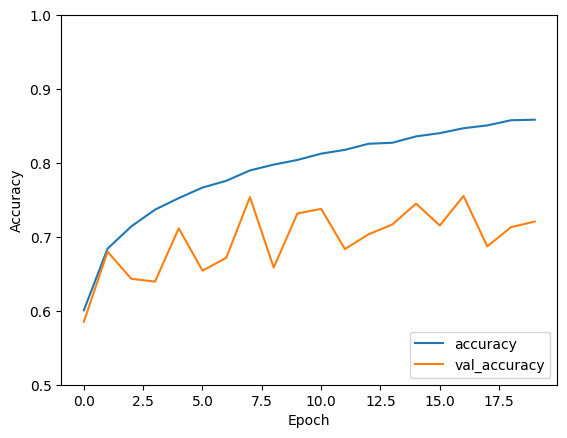

In [85]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')

plt.show()

In [89]:
y_pred_probs = tf.nn.softmax(model1.predict(X_test)).numpy()

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step


In [92]:
y_pred_classes = tf.argmax(y_pred_probs, axis=1).numpy()

#print("Predicted probabilities:", y_pred_probs)
print("Predicted classes:", y_pred_classes)

Predicted classes: [6 8 1 ... 5 1 7]


In [ ]:
import math
def plot_sample(X,Y,index1,index2):
  plt.figure(figsize=(10,10))
  num_images = index2 - index1
  cols = 5
  rows = math.ceil(num_images / cols)
  for i in range(index1,index2):
       plt.subplot(rows,cols,i-index1+1)
       plt.xticks([])
       plt.yticks([])
       plt.imshow(X[i])
       plt.xlabel(class_names[Y[i]])
  plt.show()

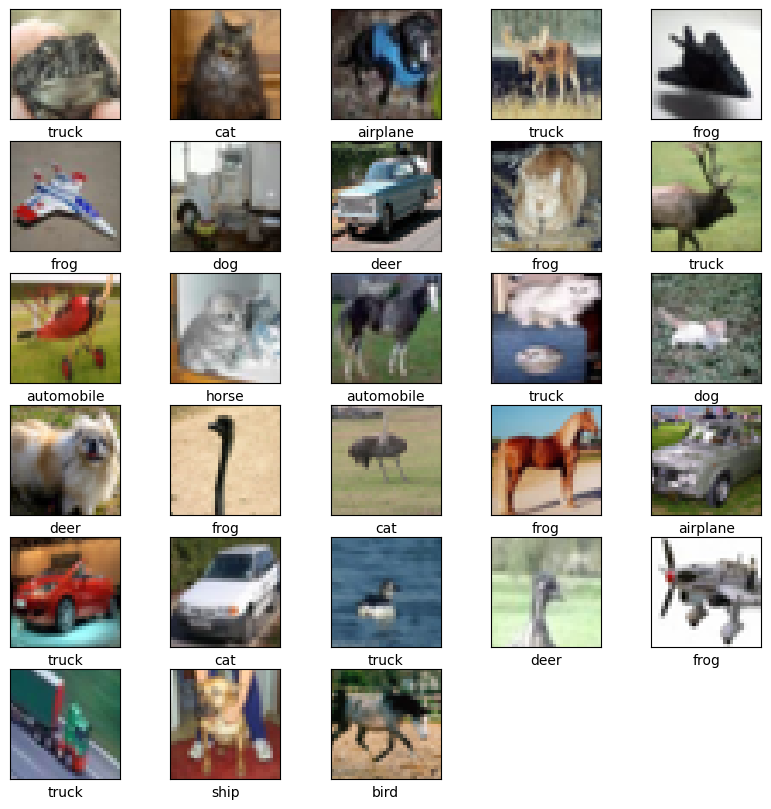

In [93]:
plot_sample(X_test,y_pred_classes,25,53)

In [94]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [95]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

In [96]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [98]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=10,
                    validation_data=(X_test, Y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 49ms/step - accuracy: 0.3561 - loss: 1.7360 - val_accuracy: 0.5526 - val_loss: 1.2413
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.5828 - loss: 1.1738 - val_accuracy: 0.6287 - val_loss: 1.0681
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 50ms/step - accuracy: 0.6494 - loss: 0.9952 - val_accuracy: 0.6702 - val_loss: 0.9485
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 48ms/step - accuracy: 0.6845 - loss: 0.9018 - val_accuracy: 0.6872 - val_loss: 0.9023
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 48ms/step - accuracy: 0.7157 - loss: 0.8160 - val_accuracy: 0.6791 - val_loss: 0.9265
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 50ms/step - accuracy: 0.7349 - loss: 0.7555 - val_accuracy: 0.6932 - val_loss: 0.8870
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 48ms/step - accuracy: 0.7515 - loss: 0.7083 - val_accuracy: 0.7154 - val_loss: 0.8357
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - accuracy: 0.7681 -

In [103]:
y_train = tf.one_hot(Y_train,depth=10)
y_test = tf.one_hot(Y_test,depth=10)
print(y_train.shape)
print(y_train[:5])
print(y_test[:5])

(50000, 10)
tf.Tensor(
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(5, 10), dtype=float32)
tf.Tensor(
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]], shape=(5, 10), dtype=float32)


In [105]:
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(y_test.shape))

number of training examples = 50000
number of test examples = 10000
X_train shape: (50000, 32, 32, 3)
Y_train shape: (50000, 10)
X_test shape: (10000, 32, 32, 3)
Y_test shape: (10000, 10)


In [109]:
from warnings import filters
def convolution_model(input_shape):
  input_images = tf.keras.Input(shape=input_shape, name='input_images')
  z1 = tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding='same',name='conv0')(input_images)
  A1 = tf.keras.layers.ReLU()(z1)
  P1 = tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2),padding='same',name='max_pool0')(A1)
  Z2 = tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='same',name='conv1')(P1)
  A2 = tf.keras.layers.ReLU()(Z2)
  P2 = tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2),padding='same',name='max_pool1')(A2)
  Z3 = tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='same',name='conv2')(P2)
  A3 = tf.keras.layers.ReLU()(Z3)
  F  = tf.keras.layers.Flatten()(A3)
  fc = tf.keras.layers.Dense(64,activation='relu',name='fc0')(F)
  outputs = tf.keras.layers.Dense(10,activation='softmax',name='fc1')(fc)
  model = tf.keras.Model(inputs=input_images,outputs=outputs)
  return model

In [112]:
conv_model = convolution_model((32, 32, 3))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_images (InputLayer)            │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv0 (Conv2D)                       │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_4 (ReLU)                       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pool0 (MaxPooling2D)             │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_5 (ReLU)                       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pool1 (MaxPooling2D)             │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2 (Conv2D)                       │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_6 (ReLU)                       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc0 (Dense)                          │ (None, 64)                  │         262,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 319,178 (1.22 MB)

 Trainable params: 319,178 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [113]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(50)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(50)
history = conv_model.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 120s 117ms/step - accuracy: 0.3763 - loss: 1.7053 - val_accuracy: 0.6087 - val_loss: 1.1066
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 109s 109ms/step - accuracy: 0.6225 - loss: 1.0734 - val_accuracy: 0.6767 - val_loss: 0.9171
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 113s 113ms/step - accuracy: 0.6910 - loss: 0.8803 - val_accuracy: 0.6983 - val_loss: 0.8661
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 114s 114ms/step - accuracy: 0.7329 - loss: 0.7647 - val_accuracy: 0.7135 - val_loss: 0.8383
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 112s 112ms/step - accuracy: 0.7615 - loss: 0.6804 - val_accuracy: 0.7145 - val_loss: 0.8598
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 145s 115ms/step - accuracy: 0.7862 - loss: 0.6153 - val_accuracy: 0.7078 - val_loss: 0.9171
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 113s 113ms/step - accuracy: 0.8072 - loss: 0.5553 - val_accuracy: 0.6822 - val_loss: 1.1021
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 113s 113ms/step - ac

<ipython-input-115-3385c227c1a4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
<ipython-input-115-3385c227c1a4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

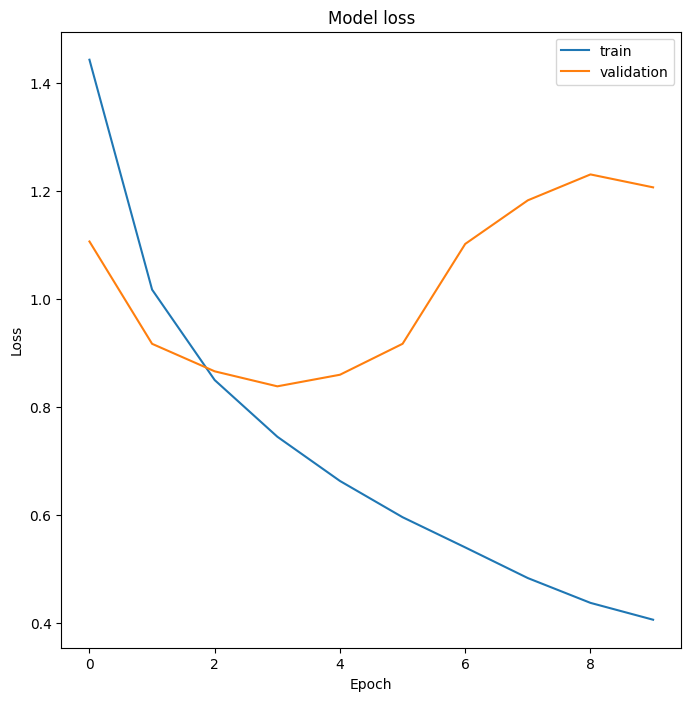

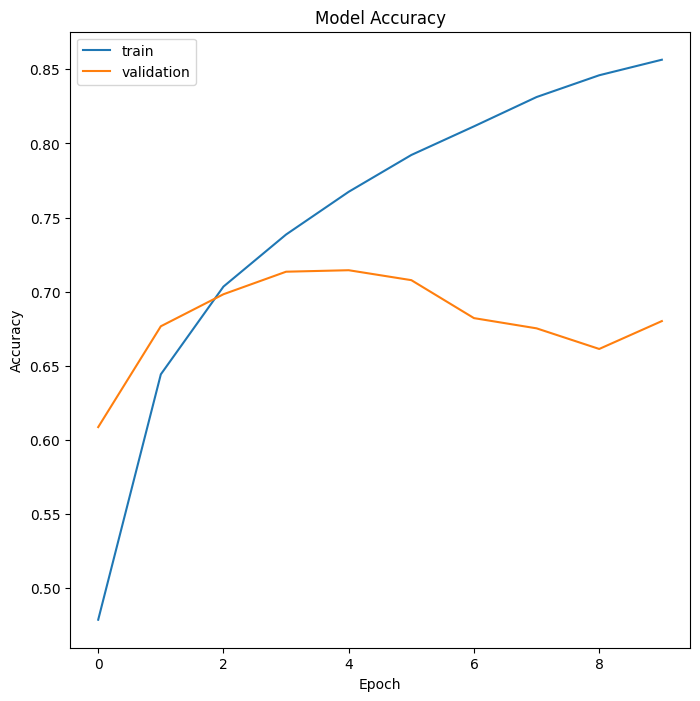

In [115]:
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(8,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(8,8)).set(xlabel='Epoch',ylabel='Accuracy')

In [118]:
y_pred_probs = tf.nn.softmax(conv_model.predict(X_test)).numpy()
y_classes = tf.argmax(y_pred_probs, axis=1).numpy()

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step


In [119]:
import math
def plot_sample(X,Y,index1,index2):
  plt.figure(figsize=(10,10))
  num_images = index2 - index1
  cols = 5
  rows = math.ceil(num_images / cols)
  for i in range(index1,index2):
       plt.subplot(rows,cols,i-index1+1)
       plt.xticks([])
       plt.yticks([])
       plt.imshow(X[i])
       plt.xlabel(class_names[Y[i]])
  plt.show()

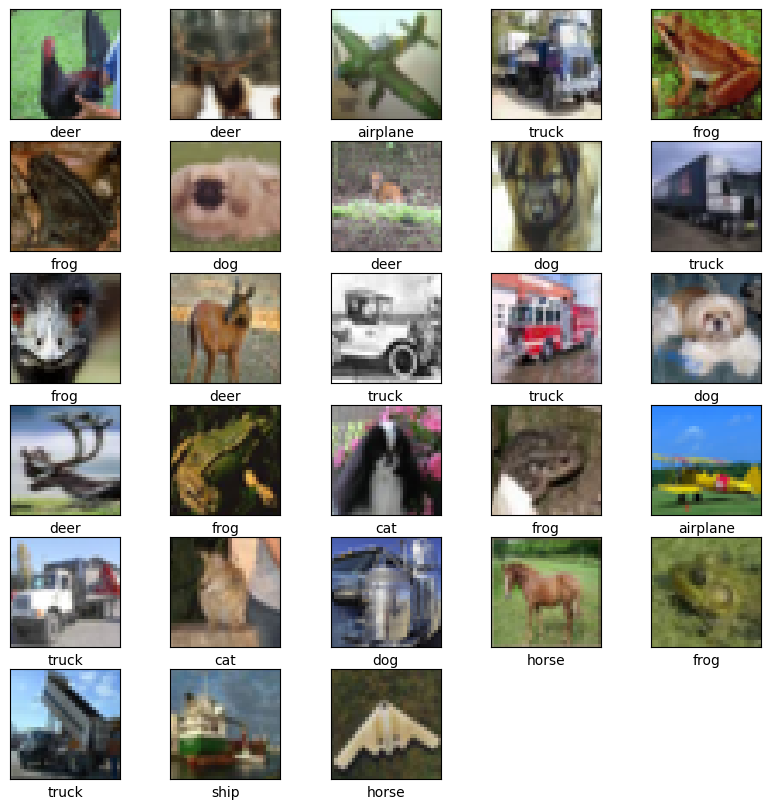

In [121]:
plot_sample(X_test,y_classes,25,53)